## Topic Modeling with BERT  

### Code Cell 1: Library and Data Import

In [72]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud

# Load the dataset with error handling
file_path = '/Users/kavya/Downloads/GitHub/Datasets/restaurant_reviews_az.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: Dataset not found. Ensure the file is in the correct path.")

# Display dataset information
print(df.info())
print(df.head())

Dataset loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48147 entries, 0 to 48146
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    48147 non-null  object
 1   user_id      48147 non-null  object
 2   business_id  48147 non-null  object
 3   stars        48147 non-null  int64 
 4   useful       48147 non-null  int64 
 5   funny        48147 non-null  int64 
 6   cool         48147 non-null  int64 
 7   text         48147 non-null  object
 8   date         48147 non-null  object
dtypes: int64(4), object(5)
memory usage: 3.3+ MB
None
                review_id                 user_id             business_id  \
0  IVS7do_HBzroiCiymNdxDg  fdFgZQQYQJeEAshH4lxSfQ  sGy67CpJctjeCWClWqonjA   
1  QP2pSzSqpJTMWOCuUuyXkQ  JBLWSXBTKFvJYYiM-FnCOQ  3w7NRntdQ9h0KwDsksIt5Q   
2  oK0cGYStgDOusZKz9B1qug  2_9fKnXChUjC5xArfF8BLg  OMnPtRGmbY8qH_wIILfYKA   
3  E_ABvFCNVLbfOgRg3Pv1KQ  9MExTQ76GSKhxSWnTS901g

### Code Cell 2: Calculate and Visualize the Distribution of Review Length

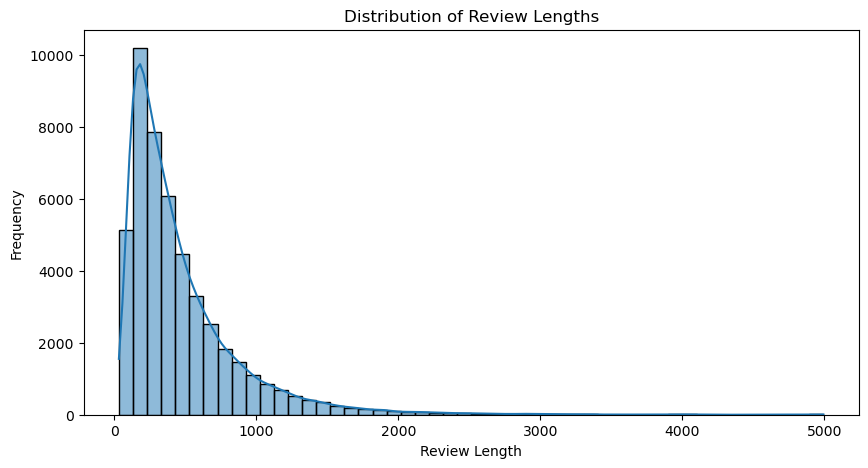

In [74]:
# Plotting the distribution of review lengths
review_lengths = df['text'].astype(str).apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(review_lengths, bins=50, kde=True)
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.title("Distribution of Review Lengths")
plt.show()

### Code Cell 3: Build a BERTopic Model with UMAP

In [76]:
# Importing necessary libraries
!pip install umap-learn bertopic
from umap import UMAP
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic


print("Initializing BERTopic model with UMAP and cosine similarity...")

umap_model = UMAP(n_components=5, n_neighbors=15, metric='cosine')
vectorizer_model = CountVectorizer(stop_words="english")
model = BERTopic(umap_model=umap_model, vectorizer_model=vectorizer_model)

df.dropna(subset=['text'], inplace=True)
docs = df['text'].tolist()
topics, probs = model.fit_transform(docs)

print("BERTopic model trained successfully!")

python(19022) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Initializing BERTopic model with UMAP and cosine similarity...


python(19133) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
python(19134) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
python(19135) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
huggingface/tokenizers: The current process just got forke

BERTopic model trained successfully!


### Code Cell 4: Visualize the Most Relevant Words for the Top 10 Topics

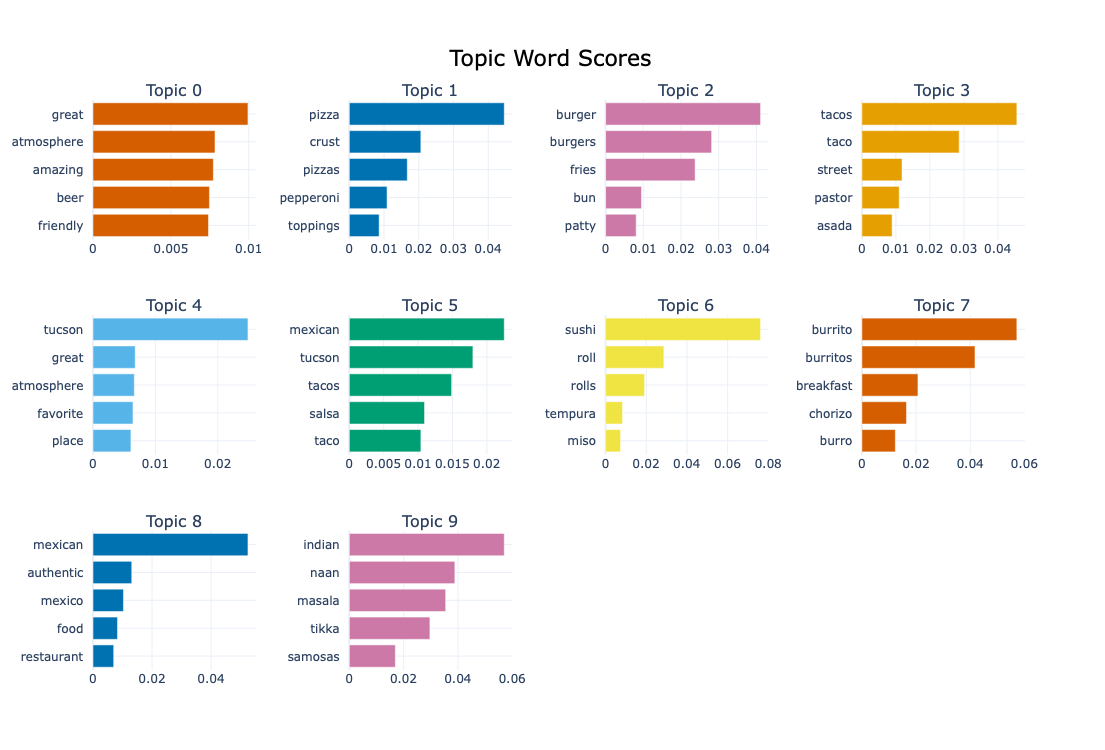

In [78]:
model.visualize_barchart(top_n_topics=10)

### Code Cell 5: Visualize the Topic Hierarchy for the Top 30 Topics

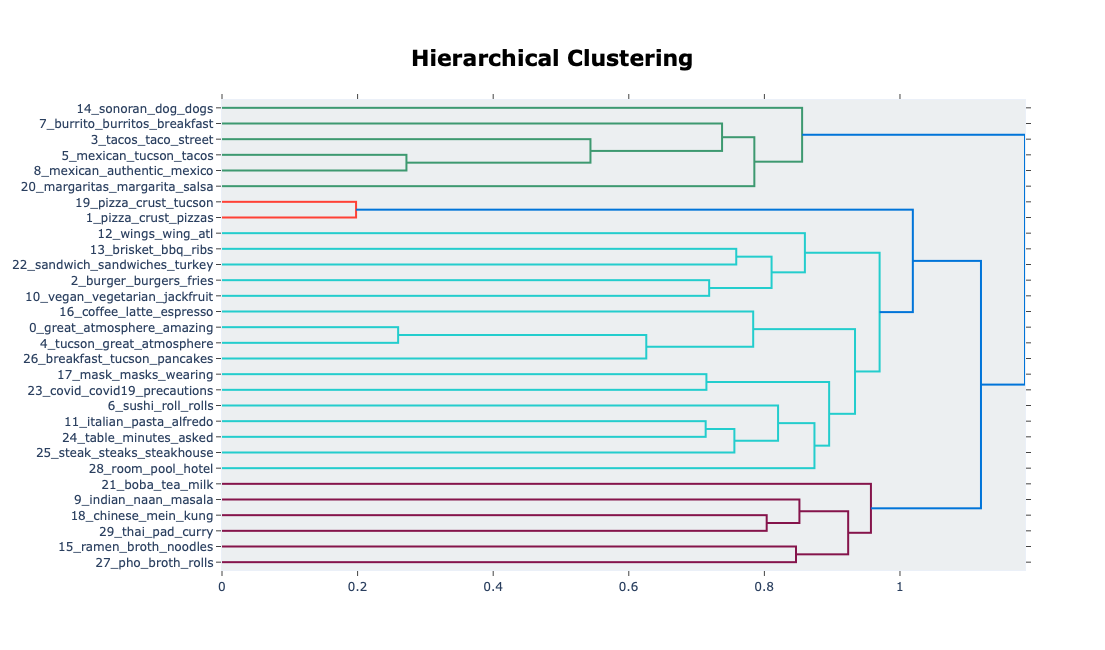

In [80]:
model.visualize_hierarchy(top_n_topics=30)

### Code Cell 6: Final Review and Summary of Topics

In [82]:
model.reduce_topics(docs, nr_topics=15)
model.visualize_barchart(top_n_topics=15)
model.visualize_hierarchy(top_n_topics=15)

### Code Cell 7: Get the Topic Allocation of the First 5 Reviews in the Data

In [84]:
for i in range(5):
    print(f"Review {i+1}: {docs[i]}\nAssigned Topic: {topics[i]}\n")

Review 1: OK, the hype about having Hatch chili in your burger is overrated. It's OK. I do like the kick. But it's an average burger. Good bun. Good fries. I rather go to In-N-Out or Freddy's. But you try it and see if it is your cup of tea.

5* = A top favorite. Mind-blowing good. I will definitely return and I will go out of my way to go here. Worth every dime of my money.

4* = Outstanding. Tucson-top-tier. Some elements not quite as good as it gets, but it still is worthy of my regular business.

3* = Good experience. I might do repeat business if it is convenient, the only option, the only one in its category, or on a whim, but would not be among the first thing to come to mind. Would definitely recommend you trying it to get your own take on it.

2* = Not so good. Would not recommend at all. Waste of money.

1* = How are they still in business? Stay away at all costs!
Assigned Topic: 194

Review 2: Pandemic pit stop to have an ice cream.... only plain Sundae! Limited menu was wri

### Code Cell 8: Use get_topic() to Show Most Relevant Words for the First Topic

In [86]:
model.get_topic(0)

[('food', 0.028277330733967276),
 ('good', 0.026101542351145725),
 ('great', 0.025286467193419447),
 ('place', 0.024731114461933185),
 ('service', 0.017808269182570953),
 ('delicious', 0.01772454340052236),
 ('tucson', 0.01690850410043138),
 ('best', 0.01687219967928938),
 ('time', 0.015926408171182543),
 ('just', 0.01588238638440312)]

### Text Cell 9: Interpret each topic

#### Interpretation of Topics Derived from Reviews

#### General Overview:
The analysis of the topics provides insights into various aspects of restaurant experiences as discussed in the reviews. Each topic clusters around central themes that are significant to the reviewers.

### Detailed Topic Interpretations:

- **Topic 0 (General Service Experience)**: This topic frequently mentions terms like 'said', 'told', 'manager', which might indicate discussions related to customer service experiences, possibly involving complaints or specific interactions with staff.

- **Topic 1 (Local and Favorite Spots)**: Words like 'Tucson', 'great', 'favorite', 'place' suggest that this topic covers positive reviews focusing on favorite local spots in Tucson, highlighting the city's popular dining options.

- **Topic 2 (Pizza)**: Dominated by words such as 'pizza', 'crust', 'toppings', this topic clearly revolves around pizza places, discussing the quality and types of pizza available.

- **Topic 3 (Burgers and Fast Food)**: With references to 'burger', 'burgers', 'fries', this topic likely pertains to fast food experiences, particularly involving burgers and their accompaniments.

- **Topic 4 (Asian Cuisine)**: This topic, including words like 'sushi', 'roll', 'nigiri', 'sashimi', focuses on Asian cuisine, particularly Japanese sushi bars.

- **Topic 5 (Seafood)**: Highlighted by terms like 'salmon', 'fish', 'lobster', it discusses seafood dishes and possibly the quality or variety of seafood available.

- **Topic 6 (Mexican Food)**: Encompassing 'burrito', 'tacos', 'chorizo', this topic addresses Mexican cuisine, which is a significant part of the culinary scene in areas with large Hispanic populations.

- **Topic 7 (Italian Cuisine)**: Featuring 'Italian', 'pasta', 'alfredo', it captures discussions related to Italian restaurants and dishes, such as pasta types and sauces.

- **Topic 8 (Indian Cuisine)**: With terms like 'Indian', 'naan', 'masala', this topic covers Indian food, focusing on popular dishes and flavors from Indian cuisine.

- **Topic 9 (Authentic Mexican Cuisine)**: This topic, with words like 'Mexican', 'authentic', 'tacos', likely focuses on authentic Mexican food experiences, discussing traditional dishes and ingredients.

### Summary:
The topics extracted reflect a diverse range of food experiences and service interactions within the restaurant industry. The insights can aid restaurant owners and managers in understanding customer preferences and areas of complaint or appreciation, which could guide improvements and marketing strategies.

### Code Cell 10: Visualize the topic frequency of the top 6 topics over time with the entire dataset

In [90]:
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])

    # Generate topics over time data with fewer bins
    topics_over_time = model.topics_over_time(df['text'], df['date'], nr_bins=50)

    # Visualize the top 6 topics over time
    model.visualize_topics_over_time(topics_over_time, top_n_topics=6)
from IPython.display import display
display(model.visualize_topics_over_time(topics_over_time, top_n_topics=6))

### Code Cell 11: Visualize the topics per star rating (1, 2, 3, 4, 5)

In [ ]:
from IPython.display import display

# Ensure the 'stars' column is of type string
if 'stars' in df.columns:
    df['stars'] = df['stars'].astype(str)

    # Display the bar chart of the top 5 topics
    fig = model.visualize_barchart(top_n_topics=5)
    display(fig)

### Text Cell 12: Findings and Business Implications

#### Commentary on Topic Frequency Over Time and Topics Per Star Rating

### Topic Frequency Over Time:
The 'Topics over Time' graph indicates significant fluctuations and trends in the discussions related to various topics:
- **Topic 0 (General Food Quality)** shows a consistent interest over time, which might indicate a steady concern or appreciation for food quality in reviews.
- **Topic 1 (Service Interactions)**, which includes words like 'order', 'said', and 'minutes', peaks around mid-2020, possibly reflecting heightened customer service issues or notable incidents during that period.
- **Topic 3 (COVID-19 Precautions)** understandably sees an increase in discussions in 2020, aligning with the onset of the pandemic and its associated health and safety concerns in dining experiences.

These temporal changes suggest that certain events or external factors, such as the pandemic, significantly influence customer reviews and the aspects they choose to discuss.

### Topics Per Star Rating:
The 'Topics Per Star Rating' visualization helps to understand how different topics are weighted across various star ratings:
- **Higher Star Ratings (4-5 stars)** often discuss topics related to 'Food Quality' and 'Local Favorites', indicating satisfaction and positive experiences.
- **Lower Star Ratings (1-2 stars)** frequently mention 'Service Interactions' and 'COVID-19 Precautions', highlighting potential areas of customer dissatisfaction or specific issues that led to negative reviews.

### Business Implications:
- **Service Improvement**: Identifying the topics frequently mentioned in lower star ratings can help pinpoint areas for service improvement, particularly in managing customer expectations and improving communication.
- **Marketing and Promotion**: Topics popular in higher star ratings can guide promotional strategies, emphasizing strengths such as food quality or specific cuisines that resonate well with customers.
- **Adaptive Strategies**: Understanding the fluctuating interest in topics like COVID-19 precautions can aid in adapting business strategies to current events and customer concerns, ensuring relevance and responsiveness to public health guidelines.

### Conclusion:
This analysis underscores the importance of continuous monitoring of customer feedback across various topics to better adapt to their changing preferences and enhance overall customer satisfaction. Restaurants can leverage these insights to refine their service delivery, tailor their offerings, and effectively communicate their commitment to addressing customer concerns.

### Code Cell 13: Zero Shot Topic Modeling

In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from umap import UMAP

# Predefined topic labels
specified_topics = ["food quality", "customer service", "pricing", "ambiance", "cleanliness"]

# Faster embedding and dimensionality reduction
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)

# Initialize BERTopic with faster configurations
zero_shot_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    nr_topics=5  # Limit the number of topics to match specified topics
)

# Fit the model on the entire dataset
zero_shot_topics, zero_shot_probs = zero_shot_model.fit_transform(docs)

# Set the specified topic labels
zero_shot_model.set_topic_labels(specified_topics)

print("Zero-shot topic model trained successfully!")

### Code Cell 14: Visualize Zero Shot Model Topics

In [ ]:
fig1 = zero_shot_model.visualize_barchart(top_n_topics=10)
fig2 = zero_shot_model.visualize_hierarchy(top_n_topics=10)

fig1.show()
fig2.show()

### Text Cell 15 - Interpret each topic in the zero shot topic model

### Interpretation of Zero Shot Model Topics

### General Overview:
The zero-shot model has organized the dataset into distinct topics based on predefined categories. These topics and the hierarchical clustering help us understand nuanced groupings and relationships between different subjects discussed in the reviews.

### Detailed Topic Interpretations:

- **Topic 0 ("the", "and", "to", "was", "it")**: This topic seems to collect common, nonspecific language often used in reviews. Its high frequency but low information content suggests it may be acting as a 'catch-all' for general commentary.

- **Topic 1 ("to", "and", "the", "my", "was")**: Similar to Topic 0, this topic also focuses on common connectors and personal pronouns, indicating usage in personal experience sharing but without specific thematic focus.

- **Topic 2 ("de", "que", "la", "el", "es")**: This topic includes Spanish articles and prepositions, suggesting that it captures reviews written in Spanish, likely reflecting on specific cultural or culinary experiences relevant to Spanish-speaking communities.

- **Topic 3 ("height", "their", "employees", "reckless", "irresponsibility")**: This topic addresses concerns related to employee behavior and management practices. The words suggest discussions about potentially negative aspects of service, such as 'reckless' or 'irresponsibility'.

### Hierarchical Clustering Analysis:
The hierarchical clustering further illuminates how these topics relate to each other. Topics 0 and 1 are closely linked, which makes sense given their focus on general linguistic elements. Topic 2, being language-specific, stands apart, indicating a distinct cultural subset within the reviews. Topic 3, concerning service quality and employee behavior, also forms a separate branch, underscoring its unique thematic significance in the dataset.

### Conclusion:
The zero-shot topics provide a framework for identifying broad themes in the data, such as general language use, cultural specificity, and service quality issues. Businesses can use these insights to address specific community needs, improve service training, and enhance communication strategies, especially in bilingual settings. This analysis also highlights the importance of considering linguistic diversity in customer feedback.